<a href="https://colab.research.google.com/github/pariwesh93/PY600/blob/main/Ad_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 12.2MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('ads.csv')

In [ ]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
TV,float64
radio,float64
newspaper,float64
sales,float64


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


The info() method shows, there is no null value in above dataset. Or There is no missing data in the dataset.

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

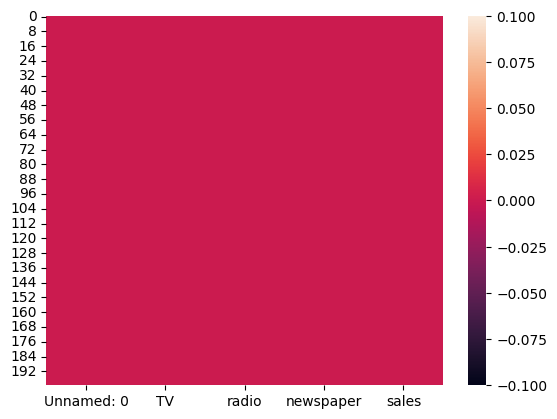

In [ ]:
sns.heatmap(df.isnull())

The heatmap shows there is no missing data in the entire rows and columns.

In [ ]:
df.loc[df.isnull().any(axis="columns")]

,Unnamed: 0,TV,radio,newspaper,sales


In [ ]:
# descriptive statistics of Data

In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Feature Selection using correlation plot

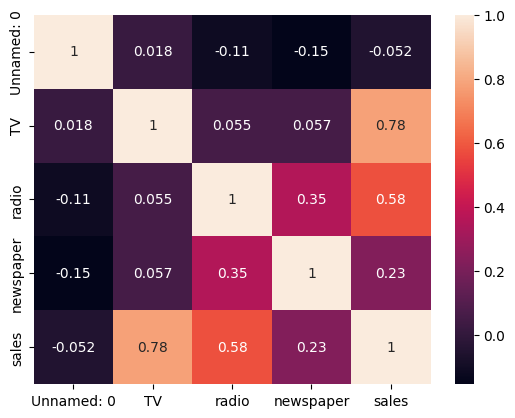

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### Feature Selection using correlation plot -- Analysis of Heatmap
* The above heatmap shows Sales is positively correlated with TV, Radio and Newspaper with values 0.78, 0.58 and 0.23 respectively.

* The plot also shows there is correlation between TV, Radio and Newspaper.

* In our data we want to predict Sales using TV, Radio and Newspaper. Hence Sales is a dependent variable and TV, Radio and Newspaper is independent variable.

* The assumption of linear regression `Independence` states that the independent variable should not be correlated. In our case TV, Radio and Newspaper are independent variable and they are correlated. This is a problem of multicolinarity. In such a case we have to drop two column.



In [ ]:
df.drop('Unnamed: 0', axis="columns", inplace=True)


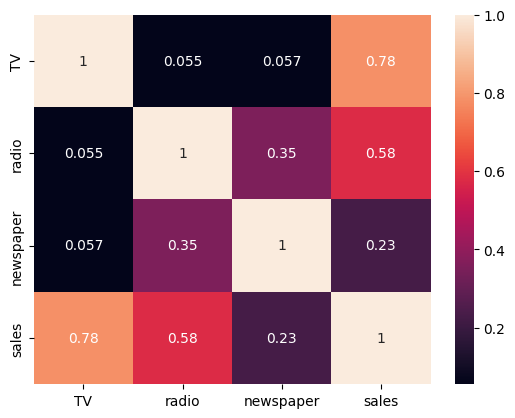

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# Selecting Features and Target

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X= df.loc[:,['TV']] # X sadhai 2D or Dataframe  ma hunxa
y= df.sales

# Train test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

# Evaluation

In [ ]:
accuracy = model.score(X_test, y_test)# in regerssion this is called r2 score.
accuracy

0.6766954295627076

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test, y_pred=y_pred)

10.204654118800956

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=y_pred)

2.444420003751042

# value of $\beta_0$ and $\beta_1$
$y = \beta_0$ + $\beta_1 x$

$\text{salary} = \beta_0$ + $\beta_1 \text{Years of Experience}$

In [ ]:
beta_0 = model.intercept_ # c in y = mx+c
beta_0

7.119638430592953

In [ ]:
beta_1= model.coef_
beta_1

array([0.04652973])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

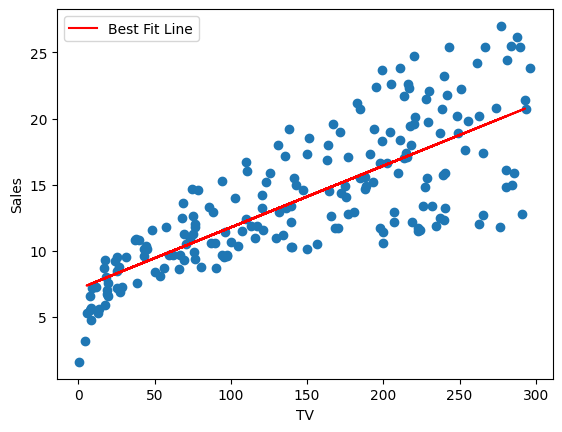

In [ ]:
plt.scatter(x=X, y=y)
plt.plot(X_test, y_pred, label="Best Fit Line", color="red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
model.predict([[50]]) # what is the sales if you have TV ads?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.44612512])

In [ ]:
model.predict([[250]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.75207186])

In [ ]:
model.predict([[175]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.26234183])

OR

In [ ]:
y_pred=model.predict([[100]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.7726118])

In [ ]:
y_pred

array([11.7726118])

# pickle — Python object serialization¶

In [ ]:
import pickle

In [ ]:
with open('Sales.pickle', "wb") as file:
  pickle.dump(model,file)

# Multiple Linear Regression

In [ ]:
# now Radio is also a independent variable

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X= df.loc[:,['TV',"radio"]] # X sadhai 2D or Dataframe  ma hunxa
y= df.sales

# Train test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

# Evaluation

In [ ]:
accuracy = model.score(X_test, y_test)# in regerssion this is called r2 score.
accuracy

0.9005833101920356

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test, y_pred=y_pred)

3.137948009068354

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1.4443023138227578

Previously when we use TV only as independent variable the accuracy was 67% after taking Radio and TV as independent variable accuracy was 90%.

* 90% accuracy is better model. also it has lower msc compare to 67% of model.

# value of $\beta_0$ and $\beta_1$
$y = \beta_0$ + $\beta_1 x$

$\text{Sales} = \beta_0$ + $\beta_1 \text{TV}$ & Radio

In [ ]:
beta_0 =model.coef_
beta_0

array([0.0447283 , 0.19066726])

In [ ]:
beta_1=model.intercept_
beta_1

3.028255250783305

# Prediction

In [ ]:
model.predict([[50,50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.79803358])

In [ ]:
model.predict([[250,50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.74369397])

In [ ]:
model.predict([[50,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.17134299])

# pickle — Python object serialization¶

In [ ]:
import pickle

In [ ]:
with open('Sales1.pickle', "wb") as file:
  pickle.dump(model,file)